In [236]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

In [237]:
from sklearn.impute import SimpleImputer
from numpy import isnan

In [329]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [238]:
df = pd.read_csv('Train.csv')

In [239]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [241]:
df.index

RangeIndex(start=0, stop=8523, step=1)

In [242]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [243]:
df.values

array([['FDA15', 9.3, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        3735.138],
       ['DRC01', 5.92, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        443.4228],
       ['FDN15', 17.5, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        2097.27],
       ...,
       ['NCJ29', 10.6, 'Low Fat', ..., 'Tier 2', 'Supermarket Type1',
        1193.1136],
       ['FDN46', 7.21, 'Regular', ..., 'Tier 3', 'Supermarket Type2',
        1845.5976],
       ['DRG01', 14.8, 'Low Fat', ..., 'Tier 1', 'Supermarket Type1',
        765.67]], dtype=object)

In [244]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [245]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [246]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [247]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [248]:
df['Item_Weight'].nunique()

415

In [249]:
df['Item_Weight'].isna().sum()

1463

In [250]:
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [251]:
df['Item_Weight'].fillna(12.857645,inplace=True)

In [252]:
df['Item_Weight'].isna().sum()

0

In [253]:
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [254]:
df['Outlet_Size'].isna().sum()

2410

In [255]:
df['Outlet_Size'].nunique()

3

In [256]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [257]:
df['Outlet_Size'] = df['Outlet_Size'].replace(to_replace = 'Small', value = 0)
df['Outlet_Size'] = df['Outlet_Size'].replace(to_replace = 'Medium', value = 1)
df['Outlet_Size'] = df['Outlet_Size'].replace(to_replace = 'High', value = 2)

In [258]:
df['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    2.0
Name: Outlet_Size, dtype: float64

In [259]:
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [260]:
df['Outlet_Size'].fillna(1.0,inplace=True)

In [261]:
df['Outlet_Size'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: Outlet_Size, dtype: float64

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


In [263]:
df['Item_Identifier'].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [264]:
df['Item_Identifier'].nunique()

1559

In [265]:
df['Item_Fat_Content'].nunique()

5

In [266]:
df['Item_Fat_Content'].head()

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [267]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [268]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1, 'LF':0, 'reg':1, 'low fat':0}, inplace = True)

In [269]:
df['Item_Fat_Content'].head()

0    0
1    1
2    0
3    1
4    0
Name: Item_Fat_Content, dtype: int64

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 799.2+ KB


In [271]:
df['Item_Type'].nunique()

16

In [272]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [273]:
df['Item_Type'].nunique()

16

In [274]:
df['Outlet_Identifier'].nunique()

10

In [275]:
df['Outlet_Location_Type'].nunique()

3

In [276]:
df['Outlet_Type'].nunique()

4

In [277]:
from sklearn.preprocessing import OneHotEncoder

In [278]:
ohe=OneHotEncoder(drop='first', sparse=False)
# drop='first' will drop first column 
# sparse=False i.e. bydefault one hot encoder provides sparse matrix, if will set sparse =False it will provide numpy array instead of sparse matrix

In [279]:
ohe.fit_transform(df[['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']])
# ohe.fit_transform(df[['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']]).toarray() no need to mention .toarray as we have mentioned sparse=False as it will provide numpy array instaed of sparse matrix
# .toarray() converts sparse matrix to numpy array

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [280]:
feature_array= ohe.fit_transform(df[['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']])

In [281]:
ohe.categories_

[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object),
 array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
        'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object),
 array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object),
 array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object)]

In [282]:
feature_labels = np.array(['Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
        'OUT035', 'OUT045', 'OUT046', 'OUT049', 'Tier 2', 'Tier 3','Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'])

In [283]:
feature_labels

array(['Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods',
       'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene',
       'Household', 'Meat', 'Others', 'Seafood', 'Snack Foods',
       'Soft Drinks', 'Starchy Foods', 'OUT013', 'OUT017', 'OUT018',
       'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049',
       'Tier 2', 'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype='<U21')

In [284]:
features = pd.DataFrame(feature_array, columns = feature_labels)
df_new = pd.concat([df,features],axis=1)

In [285]:
df_new.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type'],inplace=True)

In [286]:
df_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,OUT027,OUT035,OUT045,OUT046,OUT049,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1.0,3735.1380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5.920,1,0.019278,48.2692,2009,1.0,443.4228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.500,0,0.016760,141.6180,1999,1.0,2097.2700,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,19.200,1,0.000000,182.0950,1998,1.0,732.3800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0,0.000000,53.8614,1987,2.0,994.7052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,2.0,2778.3834,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8519,8.380,1,0.046982,108.1570,2002,1.0,549.2850,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8520,10.600,0,0.035186,85.1224,2004,0.0,1193.1136,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8521,7.210,1,0.145221,103.1332,2009,1.0,1845.5976,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [287]:
df_new.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,OUT027,OUT035,OUT045,OUT046,OUT049,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,1.000000e+00,-0.021157,-0.012049,0.024756,-0.008301,0.007225,0.011550,-0.050612,-0.001958,-0.031142,...,-1.266999e-08,-0.002343,-0.017187,0.000758,0.004953,-0.014675,0.010447,-0.002649,0.001299,-1.266999e-08
Item_Fat_Content,-2.115731e-02,1.000000,0.047314,0.006063,0.003151,0.000622,0.018719,0.032643,0.065711,0.073235,...,1.825365e-04,-0.003154,-0.006029,0.003147,0.004722,-0.003272,0.000241,0.000533,0.002129,1.825365e-04
Item_Visibility,-1.204853e-02,0.047314,1.000000,-0.001315,-0.074834,-0.069309,-0.128625,0.000416,0.043418,0.011114,...,-5.114446e-02,-0.033025,-0.038353,-0.038444,-0.036130,-0.068787,0.009650,-0.144249,-0.034671,-5.114446e-02
Item_MRP,2.475610e-02,0.006063,-0.001315,1.000000,0.005020,-0.006059,0.567574,-0.000112,0.001460,-0.005666,...,-6.713699e-03,0.011969,-0.000239,0.005983,-0.003906,0.001951,-0.000744,0.004885,0.003850,-6.713699e-03
Outlet_Establishment_Year,-8.300825e-03,0.003151,-0.074834,0.005020,1.000000,-0.193389,-0.049135,-0.003631,-0.006768,0.010998,...,-5.380723e-01,0.257868,0.174150,-0.034777,0.048836,0.540820,-0.333895,0.245070,0.466336,-5.380723e-01
Outlet_Size,7.224744e-03,0.000622,-0.069309,-0.006059,-0.193389,1.000000,0.086182,-0.003608,0.003102,-0.009676,...,9.989606e-02,-0.483409,0.099536,-0.483409,0.099596,-0.189288,0.601969,0.010163,0.099476,9.989606e-02
Item_Outlet_Sales,1.155000e-02,0.018719,-0.128625,0.567574,-0.049135,0.086182,1.000000,0.002332,-0.004656,0.007387,...,3.111920e-01,0.052823,0.002274,0.019803,0.034264,0.058261,0.046376,0.108765,-0.038059,3.111920e-01
Breads,-5.061184e-02,0.032643,0.000416,-0.000112,-0.003631,-0.003608,0.002332,1.000000,-0.019918,-0.050010,...,7.693473e-03,0.003588,0.012563,-0.003090,-0.005316,0.002933,0.001909,-0.006189,-0.000734,7.693473e-03
Breakfast,-1.958157e-03,0.065711,0.043418,0.001460,-0.006768,0.003102,-0.004656,-0.019918,1.000000,-0.032828,...,-3.550234e-03,-0.006677,-0.006638,-0.006677,0.003325,-0.008741,0.003754,-0.008695,0.000077,-3.550234e-03
Canned,-3.114182e-02,0.073235,0.011114,-0.005666,0.010998,-0.009676,0.007387,-0.050010,-0.032828,1.000000,...,1.136135e-03,0.011611,0.004627,0.001679,-0.005415,0.009366,-0.004612,0.001236,0.010418,1.136135e-03


<AxesSubplot:ylabel='Frequency'>

<Figure size 1584x1296 with 0 Axes>

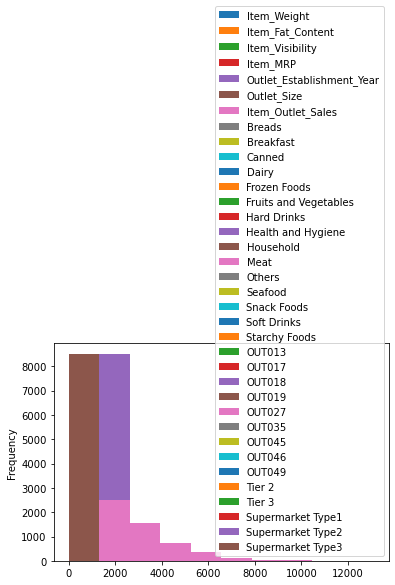

In [288]:
plt.figure(figsize=(22,18))
df_new.plot(kind='hist')

In [289]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,OUT027,OUT035,OUT045,OUT046,OUT049,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1.0,3735.1380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5.92,1,0.019278,48.2692,2009,1.0,443.4228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.50,0,0.016760,141.6180,1999,1.0,2097.2700,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,19.20,1,0.000000,182.0950,1998,1.0,732.3800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0,0.000000,53.8614,1987,2.0,994.7052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [290]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   float64
 6   Item_Outlet_Sales          8523 non-null   float64
 7   Breads                     8523 non-null   float64
 8   Breakfast                  8523 non-null   float64
 9   Canned                     8523 non-null   float64
 10  Dairy                      8523 non-null   float64
 11  Frozen Foods               8523 non-null   float64
 12  Fruits and Vegetables      8523 non-null   float64
 13  Hard Drinks                8523 non-null   float

In [291]:
import warnings
warnings.filterwarnings('ignore')

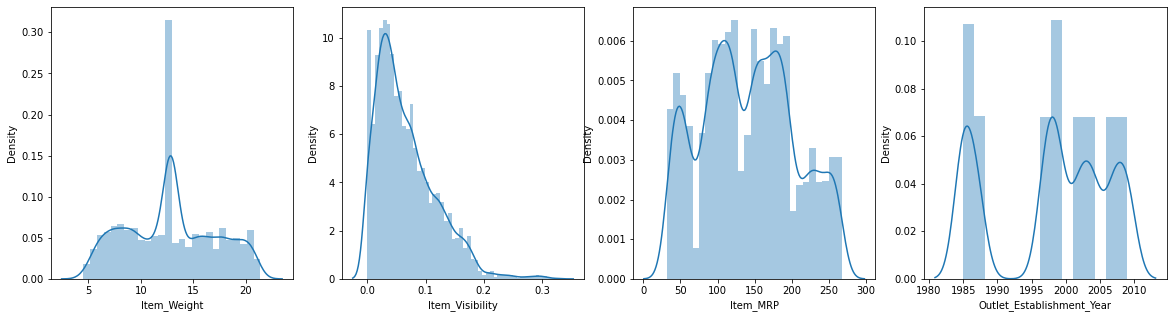

In [292]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.distplot(df['Item_Weight'])

plt.subplot(1,4,2)
sns.distplot(df['Item_Visibility'])

plt.subplot(1,4,3)
sns.distplot(df['Item_MRP'])

plt.subplot(1,4,4)
sns.distplot(df['Outlet_Establishment_Year'])

plt.show()

In [293]:
df_new.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,OUT027,OUT035,OUT045,OUT046,OUT049,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,0.829168,2181.288914,0.029450,0.012906,0.076147,...,0.109703,0.109117,0.108999,0.109117,0.109117,0.326763,0.393054,0.654347,0.108882,0.109703
std,4.226124,0.477836,0.051598,62.275067,8.371760,0.600327,1706.499616,0.169073,0.112877,0.265249,...,0.312538,0.311804,0.311656,0.311804,0.311804,0.469057,0.488457,0.475609,0.311509,0.312538
min,4.555000,0.000000,0.000000,31.290000,1985.000000,0.000000,33.290000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,1987.000000,0.000000,834.247400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.000000,0.053931,143.012800,1999.000000,1.000000,1794.331000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,1.000000,0.094585,185.643700,2004.000000,1.000000,3101.296400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.350000,1.000000,0.328391,266.888400,2009.000000,2.000000,13086.964800,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [294]:
df_new['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [295]:
df_new['Outlet_Establishment_Year'] = 2022 - df_new['Outlet_Establishment_Year']

In [296]:
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,OUT027,OUT035,OUT045,OUT046,OUT049,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,23,1.0,3735.1380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5.92,1,0.019278,48.2692,13,1.0,443.4228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.50,0,0.016760,141.6180,23,1.0,2097.2700,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,19.20,1,0.000000,182.0950,24,1.0,732.3800,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,0,0.000000,53.8614,35,2.0,994.7052,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [297]:
df_new['Outlet_Establishment_Year']

0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

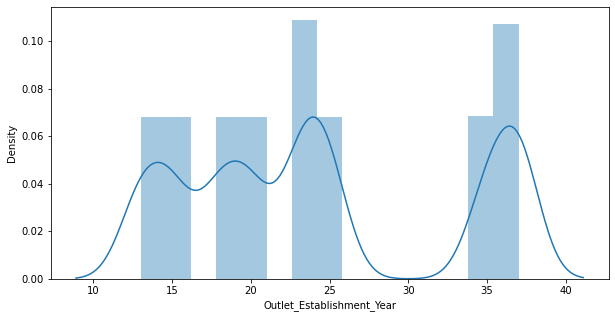

In [298]:
plt.figure(figsize=(10,5))
sns.distplot(df_new['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

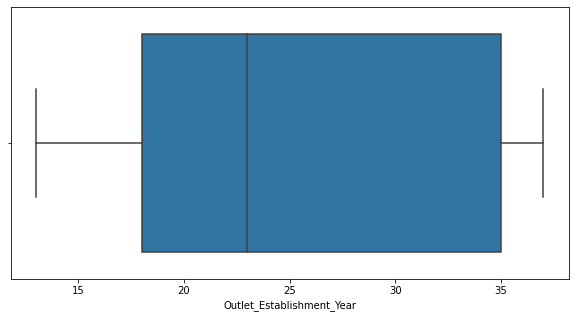

In [299]:
plt.figure(figsize=(10,5))
sns.boxplot(df_new['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_MRP'>

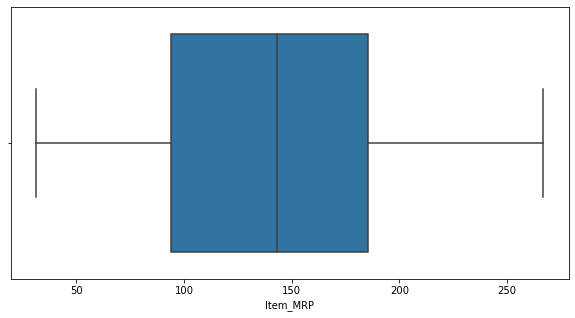

In [300]:
plt.figure(figsize=(10,5))
sns.boxplot(df_new['Item_MRP'])

<AxesSubplot:xlabel='Item_Visibility'>

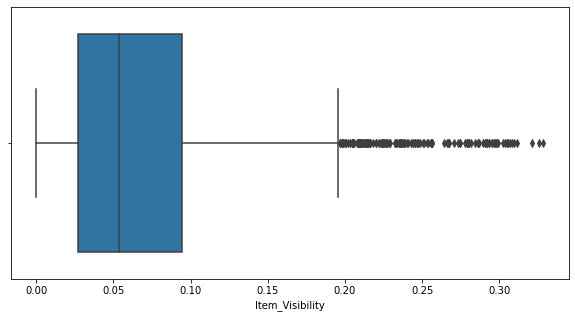

In [301]:
plt.figure(figsize=(10,5))
sns.boxplot(df_new['Item_Visibility'])

<AxesSubplot:xlabel='Item_Weight'>

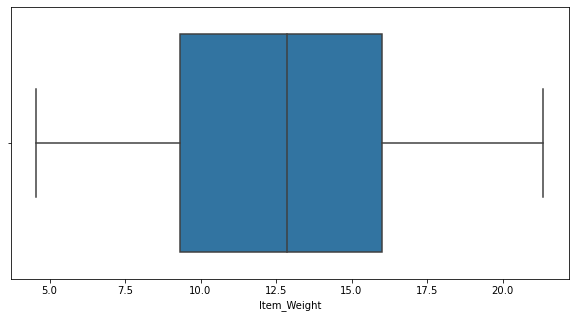

In [302]:
plt.figure(figsize=(10,5))
sns.boxplot(df_new['Item_Weight'])

In [303]:
percentile25 = df_new['Item_Visibility'].quantile(0.25)
percentile75  = df_new['Item_Visibility'].quantile(0.75)
IQR = percentile75 - percentile25

In [304]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [305]:
upper_limit

0.195979015

In [306]:
lower_limit

-0.07440424500000001

In [307]:
df_new[(df_new['Item_Visibility']>upper_limit) | (df_new['Item_Visibility']<lower_limit)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Breads,Breakfast,Canned,...,OUT027,OUT035,OUT045,OUT046,OUT049,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
49,12.857645,1,0.255395,196.8794,37,0.0,780.3176,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,12.857645,0,0.293418,194.6136,37,0.0,583.2408,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,12.857645,0,0.278974,225.3720,37,0.0,679.1160,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,17.700000,0,0.291865,115.1834,24,1.0,345.5502,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
334,12.857645,0,0.204700,76.8670,37,0.0,229.7010,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,12.857645,1,0.209163,179.1976,37,0.0,543.2928,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8345,12.857645,1,0.266397,215.6218,37,0.0,641.1654,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8371,8.270000,1,0.214125,183.9924,24,1.0,185.0924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8432,14.000000,1,0.227261,54.3640,24,1.0,159.7920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [308]:
#Trimming
#df_final = df_new[(df_new['Item_Visibility']<upper_limit) & (df_new['Item_Visibility']>lower_limit)]
#df_final.shape

In [309]:
df_final=df_new.copy() 

In [310]:
# Capping
df_final['Item_Visibility'] = np.where(
    
    df_final['Item_Visibility']>upper_limit,
    upper_limit,
    np.where(
        df_final['Item_Visibility']<lower_limit,
        lower_limit,
        df_final['Item_Visibility']
    )
)

<AxesSubplot:xlabel='Item_Visibility'>

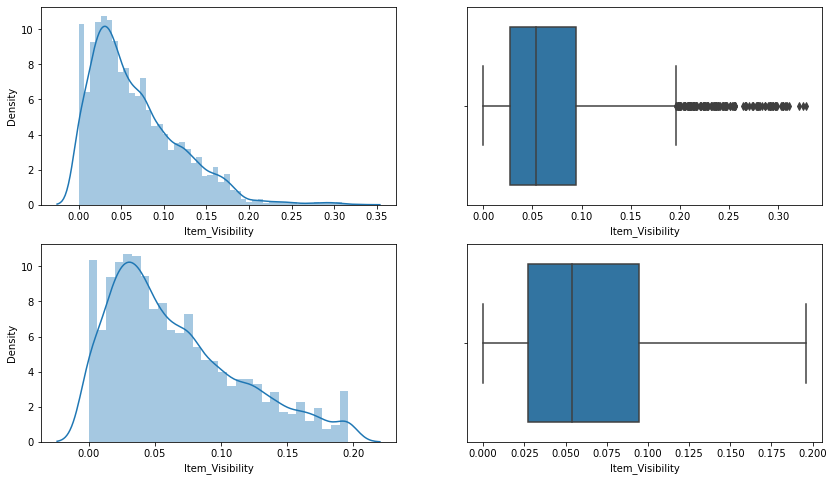

In [311]:
plt.figure(figsize = (14,8))
plt.subplot(2,2,1)
sns.distplot(df_new['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(df_new['Item_Visibility'])

plt.subplot(2,2,3)
sns.distplot(df_final['Item_Visibility'])

plt.subplot(2,2,4)
sns.boxplot(df_final['Item_Visibility'])


In [312]:
X = df_final.drop(columns = ['Item_Outlet_Sales'])
y = df_final['Item_Outlet_Sales']

In [313]:
X.shape

(8523, 35)

In [314]:
y.shape

(8523,)

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [316]:
X_train.shape

(6818, 35)

In [317]:
X_test.shape

(1705, 35)

In [319]:
y_train.shape

(6818,)

In [320]:
y_test.shape

(1705,)

In [321]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [322]:
y_pred = model.predict(X_test)
y_pred[:5]

array([3163.48212,  857.01776, 4282.02612, 5932.67748,  616.26448])

In [323]:
r2_score(y_test, y_pred)

0.48024441297573095

In [324]:
y_pred_train = model.predict(X_train)
y_pred_train[:5]

array([3433.39744,  858.61568, 3564.95952, 1099.36896, 1946.53288])

In [325]:
r2_score(y_pred_train, y_train)

0.41457097828761

In [331]:
param_grid = {'n_neighbors':np.arange(2,21),
              'p':np.arange(1,3)
}
gscv = GridSearchCV(model, param_grid,cv=5)
gscv.fit(X_train, y_train)
gscv.best_params_

{'n_neighbors': 13, 'p': 1}

In [335]:
model = KNeighborsRegressor(n_neighbors= 13, p= 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.5715321902747781

In [336]:
y_pred_train=model.predict(X_train)
r2_score(y_train, y_pred_train)

0.6110734182114799

In [339]:
mse = mean_squared_error(y_test, y_pred)
mse

1219493.2127156185

In [340]:
rmse = np.sqrt(mse)
rmse

1104.3066660650104

In [341]:
mae = mean_absolute_error(y_test, y_pred)
mae

796.0460098263027

In [343]:
model.score(X_test, y_test)

0.5715321902747781